# Sprint 01
## Submitted by : Group 5
### Car price prediction model
***

In [157]:
# Importing all the dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Dataset used:
[Kaggle website: Car price prediction data](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data) 

In [158]:
data = pd.read_csv('./archive/CarPrice_Assignment.csv')
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploratory Data Analysis and Data Cleaning
***

In [159]:
 # Removing the car_ID and symboling columns as they do not provide any relevant information
data = data.drop(['car_ID', 'symboling'], axis=1)

In [160]:
# Checking for null values
data.isnull().sum()

CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [161]:
# Checking the datatypes present inside the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [162]:
# Creating individual lists consisting of categorical and numerical column names
categorical_columns = []
numerical_columns = []
for i in data.columns:
    if data[i].dtypes == 'O': # getting all the object types
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

In [163]:
# Checking the values present
print(categorical_columns)
print(numerical_columns)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [164]:
# Label Encoding
label_encoder = LabelEncoder()
for cat in categorical_columns:
    data[cat] = label_encoder.fit_transform(data[cat])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

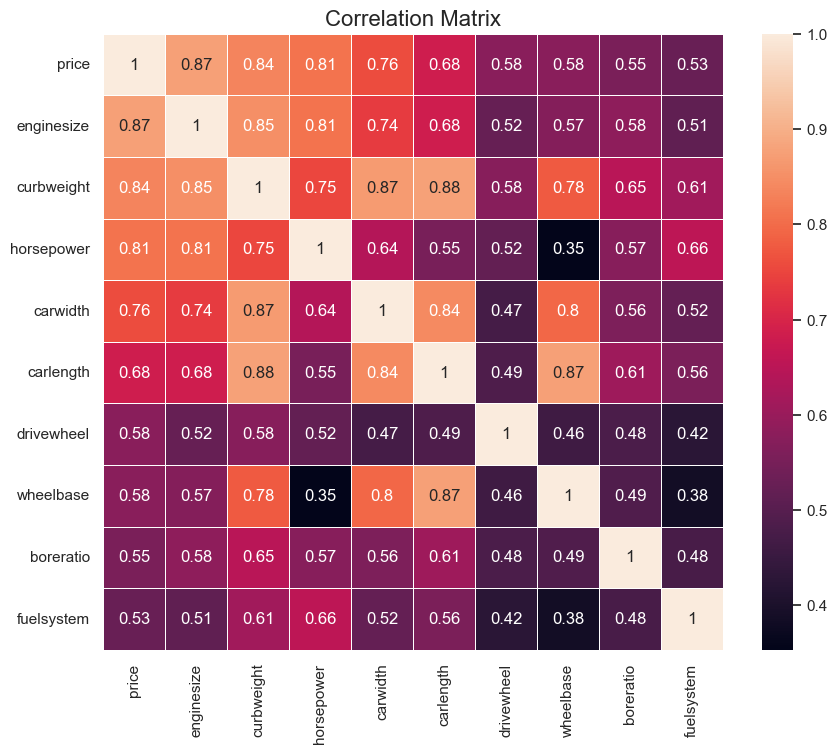

In [165]:
# Create a correlation map using seaborn or plotly
corr_map = data.corr()['price'].sort_values(ascending=False)
top_features = corr_map.index[:10] # Choosing 10 top features

# Extract the correlation matrix for top features
correlation_matrix = data[top_features].corr()

# Plotting the correlation matrix
sns.set(style="white")
sns.set_palette('coolwarm')

# Create a heatmap using Seaborn's heatmap function
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()


## Buillding the model
***

In [166]:
# Defining the data and conducting the train_test split
new_data = data[top_features] # Creating a new dataframe consisting only of the top features and target values
x = new_data.drop(columns='price')
y = new_data['price']

# Splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [167]:
# Definfing the models
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
XGB = XGBRegressor()

In [168]:
# Building and running the model
list_of_models = [DT, RF, XGB]
print('R-Squared Results:')
print('------------------')
for model in list_of_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(str(model).split('(', 1)[0]," R-Squared:",r2_score(y_test, y_pred)*100)


R-Squared Results:
------------------
DecisionTreeRegressor  R-Squared: 86.95323322030809
RandomForestRegressor  R-Squared: 95.6368617568793
XGBRegressor  R-Squared: 92.55578566620893


As we can see from the above results, RandomForestRegressor has got the highest R-Squared value with 95.6%, hence making it the best model for the price prediction task.